In [ ]:
!gdown --id 1bTtIDHMP6a5dQ3a2Aw9AAR8Flprjb3Ei

Downloading...
From: https://drive.google.com/uc?id=1bTtIDHMP6a5dQ3a2Aw9AAR8Flprjb3Ei
To: /content/data.csv
100% 527k/527k [00:00<00:00, 32.6MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv("/content/data.csv")
data=df.copy()
print(len(data))

4600


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
data.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

The dataset has no null values 


In [ ]:
len(data[data["price"]==0])

49

49 Samples in the dataset have a price value of Zero and they should be discarded

In [ ]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


As we can see here we have some problems:
   -There is a house with a price of 26.59 Millions (an outlier)
   -price of value 0
   -house with 0 bedrooms
   -yr_renovated with  values of 0

In [ ]:
data2 = data[(data.price<2.65*10**7) & (data.bedrooms>0) & (data.price>0) &(data.bathrooms>0)].copy()

In [ ]:

len(data[data.yr_renovated==0])

2735

2735 houses have yr_renovated value of 0 as we can not discard this samples we will create another features "is_renovated" that tells if the house has been renovated or not

In [ ]:
data2["is_renovated"]=data2["yr_renovated"]/data2["yr_renovated"]
data2["is_renovated"]=data2["is_renovated"].fillna(0)
data2.drop("yr_renovated",axis=1,inplace=True)
data2.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,statezip,country,is_renovated
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,WA 98133,USA,1.0
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,WA 98119,USA,0.0
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,WA 98042,USA,0.0
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,WA 98008,USA,0.0
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,WA 98052,USA,1.0


In [ ]:
print(data2.columns)
data2["country"].value_counts()

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'street', 'city', 'statezip', 'country',
       'is_renovated'],
      dtype='object')


USA    4548
Name: country, dtype: int64

There is only one value in the country column so the column is useless

In [ ]:
data2.drop("country",axis=1,inplace=True)


In [ ]:
#Now let's handle column with string values starting with the date column
data2["date"]=pd.to_datetime(data2["date"])
data2["date_year"]=data2["date"].dt.year
data2["date_month"]=data2["date"].dt.month
data2["date_day"]=data2["date"].dt.day

In [ ]:
data2["date_year"].value_counts()

2014    4548
Name: date_year, dtype: int64

In [ ]:
#Let's drop the column date_year as it has only one value
data2.drop("date_year",axis=1,inplace=True)

In [ ]:
data2.drop("date",axis=1,inplace=True)
data2.tail()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,statezip,is_renovated,date_month,date_day
4595,308166.666667,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,501 N 143rd St,Seattle,WA 98133,1.0,7,9
4596,534333.333333,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,14855 SE 10th Pl,Bellevue,WA 98007,1.0,7,9
4597,416904.166667,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,759 Ilwaco Pl NE,Renton,WA 98059,0.0,7,9
4598,203400.000000,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,5148 S Creston St,Seattle,WA 98178,0.0,7,10
4599,220600.000000,3.0,2.50,1490,8102,2.0,0,0,4,1490,0,1990,18717 SE 258th St,Covington,WA 98042,0.0,7,10


In [ ]:
print(len(data2))
data2["date_month"].value_counts()

4548


6    2153
5    1748
7     647
Name: date_month, dtype: int64

In [ ]:
data2["date_day"].value_counts()

9     294
2     231
23    226
20    220
8     217
27    193
19    184
5     180
7     178
3     178
16    169
12    167
13    162
6     152
30    141
26    138
25    135
10    134
24    128
28    123
1     122
17    113
4     107
18    104
21    101
22     98
14     89
11     88
15     88
29     82
31      6
Name: date_day, dtype: int64

In [ ]:
data.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [ ]:
print(data2["statezip"].value_counts())
print(data2["street"].value_counts())
print(data2["city"].value_counts())

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    129
WA 98006    109
           ... 
WA 98047      6
WA 98288      3
WA 98354      2
WA 98050      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64
2520 Mulberry Walk NE      4
2500 Mulberry Walk NE      3
9413 34th Ave SW           2
34809 SE Garden Ct         2
4507 Linden Ave N          2
                          ..
14608 SE 195th Pl          1
11049 Sand Point Way NE    1
29678 130th Way SE         1
4708 154th Pl SE           1
3611 NE 137th St           1
Name: street, Length: 4473, dtype: int64
Seattle                1560
Renton                  291
Bellevue                281
Redmond                 234
Kirkland                187
Issaquah                186
Kent                    183
Auburn                  175
Sammamish               171
Federal Way             145
Shoreline               123
Woodinville             114
Maple Valley             95
Mercer Island            82
Burien                   72
Sno

In [ ]:
#Now let's handle statezip, street and city columns
categorical_data=data2.select_dtypes(include=['object']).copy()
categorical_data.head()

,street,city,statezip
0,18810 Densmore Ave N,Shoreline,WA 98133
1,709 W Blaine St,Seattle,WA 98119
2,26206-26214 143rd Ave SE,Kent,WA 98042
3,857 170th Pl NE,Bellevue,WA 98008
4,9105 170th Ave NE,Redmond,WA 98052


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
categorical_data["street_encoded"]=lb.fit_transform(categorical_data["street"])
categorical_data["statezip_encoded"]=lb.fit_transform(categorical_data["statezip"])
categorical_data["city_encoded"]=lb.fit_transform(categorical_data["city"])
categorical_data.drop(["street","city","statezip"],axis=1,inplace=True)
categorical_data.head()

,street_encoded,statezip_encoded,city_encoded
0,1506,62,36
1,3851,58,35
2,2265,26,18
3,4213,7,3
4,4302,31,31


In [ ]:
for col in categorical_data.columns:
  data2[col]=categorical_data[col]
data2.head()  

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,street,city,statezip,is_renovated,date_month,date_day,street_encoded,statezip_encoded,city_encoded
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,18810 Densmore Ave N,Shoreline,WA 98133,1.0,5,2,1506,62,36
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,709 W Blaine St,Seattle,WA 98119,0.0,5,2,3851,58,35
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,26206-26214 143rd Ave SE,Kent,WA 98042,0.0,5,2,2265,26,18
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,857 170th Pl NE,Bellevue,WA 98008,0.0,5,2,4213,7,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,9105 170th Ave NE,Redmond,WA 98052,1.0,5,2,4302,31,31


In [ ]:
data2.drop(["statezip","street","city"],axis=1,inplace=True)
data2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,is_renovated,date_month,date_day,street_encoded,statezip_encoded,city_encoded
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,1.0,5,2,1506,62,36
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0.0,5,2,3851,58,35
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0.0,5,2,2265,26,18
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0.0,5,2,4213,7,3
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1.0,5,2,4302,31,31


Good!! 😉
 Now we are only left with numerical data

In [ ]:
len(data2.columns)

18

In [ ]:
data_train=data2.loc[:,data2.columns!="price"] #feature columns
data_labels=data2["price"] #labels

In [ ]:
#Now let's Normalize the features value using z-score normalization to avoid overflow in the model predictions
#we will use z-score normalization for that
for col in data_train.columns:
  data_train[col]=(data_train[col]-data_train[col].mean())/data_train[col].std()
data_train.head() 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,is_renovated,date_month,date_day,street_encoded,statezip_encoded,city_encoded
0,-0.439233,-0.846141,-0.828893,-0.192471,-0.021873,-0.081478,-0.306326,-0.665556,-0.564179,-0.671661,-0.530229,1.211360,-1.107771,-1.474796,-0.567362,1.112282,0.859734
1,1.777895,0.443703,1.589358,-0.160838,0.907841,-0.081478,4.921329,2.296234,1.814727,-0.065694,-1.672491,-0.825337,-1.107771,-1.474796,1.246858,0.920788,0.776219
2,-0.439233,-0.201219,-0.211244,-0.080310,-0.951588,-0.081478,-0.306326,0.815339,0.127227,-0.671661,-0.160674,-0.825337,-1.107771,-1.474796,0.019842,-0.611167,-0.643529
3,-0.439233,0.121242,-0.137964,-0.189191,-0.951588,-0.081478,-0.306326,0.815339,-0.962617,1.492508,-0.261462,-0.825337,-1.107771,-1.474796,1.526921,-1.520766,-1.896248
4,0.669331,0.443703,-0.200776,-0.120532,-0.951588,-0.081478,-0.306326,0.815339,-0.798554,1.059674,0.175285,1.211360,-1.107771,-1.474796,1.595776,-0.371799,0.442161


Very Cool Now we have all our data normalized!!

In [ ]:
data_train["price"]=data2["price"]
data_trains=data_train[(data_train["price"]<(data_train["price"].mean()+data_train["price"].std())) &(data_train["price"]>(data_train["price"].mean()-data_train["price"].std()))]
len(data_trains)

4125

after removing all outliers, Now the prices in our dataset follow a Gaussian distribution we have a total samples of 4125

In [ ]:
# Let's split our dataset into a training set and a test set
def train_test_split_func(data,ratio):
  random_indices=np.random.permutation(len(data))
  train_set=int(ratio*len(data))
  train_indices=random_indices[:train_set]
  test_indices=random_indices[train_set:]
  return data.iloc[train_indices],data.iloc[test_indices]
train_dataset,test_dataset=train_test_split_func(data_trains,0.8)  



here,the dataset has been split into a training set and a test set

In [ ]:
print(len(train_dataset))
print(len(test_dataset))

3300
825


In [ ]:
X_train=train_dataset.loc[:,train_dataset.columns!="price"]
Y_train=train_dataset["price"]
X_test=test_dataset.loc[:,test_dataset.columns!="price"]
Y_test=test_dataset["price"]


In [ ]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,is_renovated,date_month,date_day,street_encoded,statezip_encoded,city_encoded
792,0.669331,0.121242,-0.284525,-0.217822,-0.951588,-0.081478,-0.306326,-0.665556,-0.821992,0.929824,0.276073,1.211360,-1.107771,0.137941,0.622519,-1.233524,-0.977587
2587,-0.439233,-1.491064,-1.059202,-0.348469,-0.951588,-0.081478,-0.306326,0.815339,-1.173554,-0.022410,-1.974855,1.211360,0.353831,0.137941,1.226743,0.825041,0.776219
457,0.669331,1.733548,0.626245,-0.327704,0.907841,-0.081478,-0.306326,-0.665556,0.678008,0.042515,1.183164,-0.825337,-1.107771,-0.668428,0.048467,0.777167,0.776219
3001,0.669331,0.121242,0.040003,-0.143743,-0.951588,-0.081478,-0.306326,0.815339,-0.611054,1.211166,0.175285,1.211360,0.353831,0.598723,1.149377,-1.616513,-1.896248
4044,-0.439233,0.443703,0.940304,-0.160755,0.907841,-0.081478,-0.306326,-0.665556,1.416290,-0.671661,1.283951,-0.825337,1.815433,-0.898818,0.957511,-0.084558,0.525676


In [ ]:
print(len(X_train.columns))
print(len(data2[data2["bathrooms"]==0]))
X_train.columns


17
0


Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'is_renovated', 'date_month', 'date_day', 'street_encoded',
       'statezip_encoded', 'city_encoded'],
      dtype='object')

In [ ]:
from sklearn.metrics import mean_squared_error 
def gradient_descent(X,y,lr=0.001,epochs=100):
  b0,b1,b2,b3,b4,b5,b6,b7,b8,b9=0,0,0,0,0,0,0,0,0,0
  b10,b11,b12,b13,b14,b15,b16=0,0,0,0,0,0,0
  log,mse=[],[]
  for i in range(epochs):
    sumyhat=0
    sumb1hat, sumb2hat,sumb3hat,sumb4hat,sumb5hat,sumb6hat,sumb7hat=0,0,0,0,0,0,0
    sumb8hat,sumb9hat,sumb10hat,sumb11hat,sumb12hat,sumb13hat,sumb14hat,sumb15hat=0,0,0,0,0,0,0,0
    sumb16hat=0
    for j in range(len(X)):
      val1=b0+b1*X.iat[j,0]+b2*X.iat[j,1]+b3*X.iat[j,2]+b4*X.iat[j,3]+b5*X.iat[j,4]+b6*X.iat[j,5]+b7*X.iat[j,6]+b8*X.iat[j,7]+b9*X.iat[j,8]+b10*X.iat[j,9]+b11*X.iat[j,10]
      val2=b12*X.iat[j,11]+b13*X.iat[j,12]+b14*X.iat[j,13]+b15*X.iat[j,14]+b16*X.iat[j,15]
      val3=y.iat[j]
      val=val1+val2-val3
      sumyhat+=val
      sumb1hat+=val*X.iat[j,0]
      sumb2hat+=val*X.iat[j,1]
      sumb3hat+=val*X.iat[j,2]
      sumb4hat+=val*X.iat[j,3]
      sumb5hat+=val*X.iat[j,4]
      sumb6hat+=val*X.iat[j,5]
      sumb7hat+=val*X.iat[j,6]
      sumb8hat+=val*X.iat[j,7]
      sumb9hat+=val*X.iat[j,8]
      sumb10hat+=val*X.iat[j,9]
      sumb11hat+=val*X.iat[j,10]
      sumb12hat+=val*X.iat[j,11]
      sumb13hat+=val*X.iat[j,12]
      sumb14hat+=val*X.iat[j,13]
      sumb15hat+=val*X.iat[j,14]
      sumb16hat+=val*X.iat[j,15]
    b0-=lr*(1/len(X))*sumyhat
    b1-=lr*(1/len(X))*sumb1hat
    b2-=lr*(1/len(X))*sumb2hat
    b3-=lr*(1/len(X))*sumb3hat
    b4-=lr*(1/len(X))*sumb4hat
    b5-=lr*(1/len(X))*sumb5hat
    b6-=lr*(1/len(X))*sumb6hat
    b7-=lr*(1/len(X))*sumb7hat
    b8-=lr*(1/len(X))*sumb8hat
    b9-=lr*(1/len(X))*sumb9hat
    b10-=lr*(1/len(X))*sumb10hat
    b11-=lr*(1/len(X))*sumb11hat
    b12=lr*(1/len(X))*sumb12hat
    #b13-=lr*(1/len(X))*sumb13hat
    b13-=lr*(1/len(X))*sumb13hat
    b14-=lr*(1/len(X))*sumb14hat
    b15-=lr*(1/len(X))*sumb15hat
    b16-=lr*(1/len(X))*sumb16hat
    
    log.append((b0,b1,b2,b3,b4,b5,b6,b7,b8,b9,b10,b11,b12,b13,b14,b15,b16))
    mse.append(mean_squared_error(y,(b0+b1*X["bedrooms"]+b2*X["bathrooms"]+b3*X["sqft_living"]+b4*X["sqft_lot"]+b5*X["floors"]+b6*X["waterfront"]+b7*X["view"]+b8*X["condition"]+b9*X["sqft_above"]+b10*X["sqft_basement"]+b11*X["yr_built"]+b12*X["date_month"]+b13*X["date_day"]+b14*X["street_encoded"]+b15*X["city_encoded"]+b16*X["statezip_encoded"])))
    if(i%10000==0):
      print("Epoch",i)
      print("mean_squared_error", mse)
    if(i>0):
      if(abs(mse[i]-mse[i-1])<0.5):
        break
  return log,mse

In [ ]:
print(len(df)-len(data2))

52


In [ ]:

log,mse=gradient_descent(X_train,Y_train,lr=0.5,epochs=500000)

Epoch 0
mean_squared_error [87037980936.33925]


Training using Gradient descent with a step size of 0.5

In [ ]:
#training using gradient descent with a step size of 1.0
log1,mse1=gradient_descent(X_train,Y_train,lr=1.0,epochs=500000)

Epoch 0
mean_squared_error [29290335996.674877]


/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value enc

ValueError: ignored

In [ ]:
log2,mse2=gradient_descent(X_train,Y_train,lr=0.01,epochs=500000)

Epoch 0
mean_squared_error [254324546442.2391]


Training using gradient descent with a step size of 0.01

In [ ]:
log3,mse3=gradient_descent(X_train,Y_train,lr=0.1,epochs=500000)

Epoch 0
mean_squared_error [215440984387.0927]


Training using gradient descent with a step size of 0.1

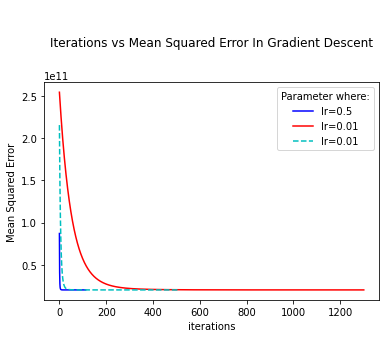

In [64]:
plt.plot(np.arange(len(mse)),mse,"b",label="lr=0.5")
plt.plot(np.arange(len(mse2)),mse2,"-r",label="lr=0.01")
plt.plot(np.arange(len(mse3)),mse3,"c--",label="lr=0.01")
plt.xlabel("iterations")
plt.ylabel("Mean Squared Error")
plt.legend(title='Parameter where:')
plt.title("\n\nIterations vs Mean Squared Error In Gradient Descent\n\n")
plt.show()

In [96]:

print("lr=0.5: ",np.sqrt(mse[-1]))
print("lr=0.1: ",np.sqrt(mse2[-1]))
print("lr=0.01: ",np.sqrt(mse3[-1]))

lr=0.5:  142156.47297304057
lr=0.1:  142137.18090381613
lr=0.01:  142139.30754708606


We can see that as the learning rate increase so the training error.
I WILL USE THE ROOT MEAN SQUARED ERROR WHICH IS THE SQUARED ROOT OF THE MEAN SQUARED ERROR BECAUSE THE MEAN SQUARED ERROR IS VERY LARGE FOR OUR TASK

In [ ]:
#test error function
def error_test(X,y,params):
  return mean_squared_error(y,(params[-1][0]+params[-1][1]*X["bedrooms"]+params[-1][2]*X["bathrooms"]+params[-1][-14]*X["sqft_living"]+params[-1][-13]*X["sqft_lot"]+params[-1][-12]*X["floors"]+params[-1][-11]*X["waterfront"]+params[-1][-10]*X["view"]+params[-1][-9]*X["condition"]+params[-1][-8]*X["sqft_above"]+params[-1][-7]*X["sqft_basement"]+params[-1][-6]*X["yr_built"]+params[-1][-5]*X["date_month"]+params[-1][-4]*X["date_day"]+params[-1][-3]*X["street_encoded"]+params[-1][-2]*X["city_encoded"]+params[-1][-1]*X["statezip_encoded"]))

In [73]:
print("Test Error for Gradient Descent with step size of 0.5: ",np.sqrt(error_test(X_test,Y_test,log)))
print("Test Error for Gradient Descent with step size of 0.01: ",np.sqrt(error_test(X_test,Y_test,log2)))
print("Test Error for Gradient Descent with step size of 0.1: ",np.sqrt(error_test(X_test,Y_test,log3)))

Test Error for Gradient Descent with step size of 0.5:  143942.4412892878
Test Error for Gradient Descent with step size of 0.01:  143866.57620073174
Test Error for Gradient Descent with step size of 0.1:  143863.80600874807


here, A step size of 0.1 is a good one for the test set because it has the smallest error

It just take 127 iterations for gradient descent to converge 

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
regression=LinearRegression()
regression.fit(X_train.values,Y_train)

LinearRegression()

In [75]:
from sklearn.metrics import mean_squared_error
y_pred=regression.predict(X_train.values)
print(np.sqrt(mean_squared_error(Y_train,y_pred)))

138942.49593372873


Training error with Linear Regression model from scikit-learn

In [76]:

y_pred_test=regression.predict(X_test.values)
print(np.sqrt(mean_squared_error(Y_test,y_pred_test)))

143246.5921419633


Test error with Linear Regression model from scikit-learn

In [77]:
#Pearson correlation Matrix
coeff_df = pd.DataFrame(regression.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-20741.942490
bathrooms,31385.049384
sqft_living,70222.378180
sqft_lot,-3005.123550
floors,23334.524921
waterfront,3752.906348
view,15268.717472
condition,16040.619138
sqft_above,64741.019039
sqft_basement,25609.155948


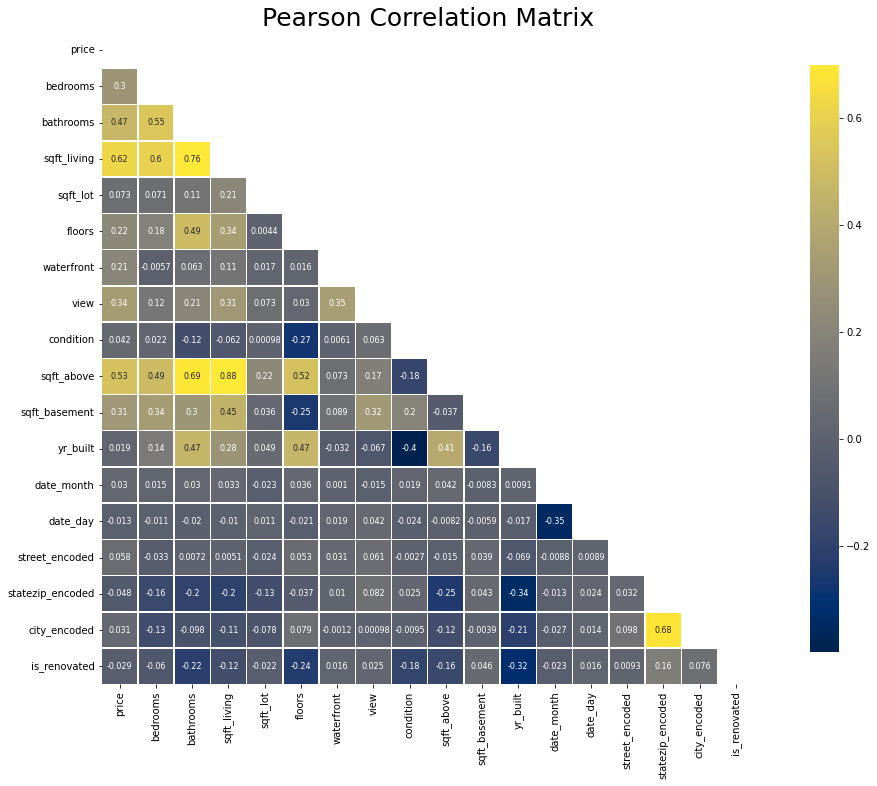

In [78]:
import seaborn as sns
features=["price",'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'date_month', 'date_day', 'street_encoded',
       'statezip_encoded', 'city_encoded',"is_renovated"]
mask=np.zeros_like(data_train[features].corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
f,ax=plt.subplots(figsize=(20,12))
plt.title("Pearson Correlation Matrix",fontsize=25)
sns.heatmap(data2[features].corr(),linewidths=0.5,vmax=0.7,square=True,cmap="cividis", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9})

we now have to choose feature correlated with the price but independent to each other


In [90]:
from sklearn.model_selection import train_test_split
X_train_new=X_train[["sqft_living","waterfront","view","condition","street_encoded"]]
regression.fit(X_train_new.values,Y_train)
y_pred=regression.predict(X_train_new.values)
print(np.sqrt(mean_squared_error(Y_train,y_pred)))

149944.28990359724


In [91]:
y_pred_test=regression.predict(X_test[["sqft_living","waterfront","view","condition","street_encoded"]].values)
print(np.sqrt(mean_squared_error(Y_test,y_pred_test)))

152285.60131458857


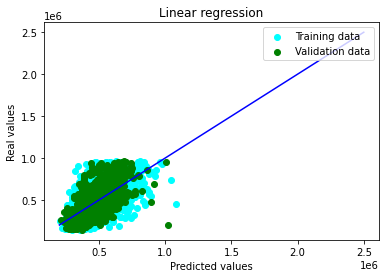

In [98]:
plt.scatter(y_pred, Y_train, c = "cyan",  label = "Training data")
plt.scatter(y_pred_test, Y_test, c = "green",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper right")
plt.plot([0.2*10**6, 0.25*10**7], [0.2*10**6, 0.25*10**7], c = "blue")
plt.show()
